# Proyecto ds4a EDA

In [90]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt


import folium  
from folium.plugins import HeatMap

from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   collections           import Counter
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score

%matplotlib inline
sns.set()

In [91]:
import json
import requests
import os
import datetime

In [92]:
accidents_2015=pd.read_csv('/home/bibianamolina/DS4A-traffic-project/eda/dataset_2015_with_negatives.csv',sep=',')
accidents_2016=pd.read_csv('/home/bibianamolina/DS4A-traffic-project/eda/dataset_2016_with_negatives.csv',sep=',')
accidents_2017=pd.read_csv('/home/bibianamolina/DS4A-traffic-project/eda/dataset_2017_with_negatives.csv',sep=',')
accidents_2018=pd.read_csv('/home/bibianamolina/DS4A-traffic-project/eda/dataset_2018_with_negatives.csv',sep=',')
accidents_2019=pd.read_csv('/home/bibianamolina/DS4A-traffic-project/eda/dataset_2019_with_negatives.csv',sep=',')


/home/bibianamolina/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [93]:
accidents_All=pd.concat([accidents_2015, accidents_2016,accidents_2017,
                        accidents_2018,accidents_2019], ignore_index=True)

In [94]:
accidents_All

,x,y,timestamp,date,year,month,day,day_of_year,day_of_week,hour,...,windSpeed,cloudCover,uvIndex,visibility,windBearing,windGust,pressure,precipType,ozone,precipAccumulation
0,-74.023482,4.766878,2015-10-17 21:00:00,2015-10-17,2015,10,17,290,5,21,...,3.10,0.44,2.0,10.003,90.0,NaN,NaN,NaN,NaN,NaN
1,-74.051162,4.698991,2015-10-17 21:00:00,2015-10-17 00:00:00,2015,10,17,290,5,21,...,3.10,0.44,2.0,10.003,90.0,NaN,NaN,NaN,NaN,NaN
2,-74.072893,4.598232,2015-02-17 08:10:00,2015-02-17,2015,2,17,48,1,8,...,1.50,0.44,0.0,10.003,320.0,NaN,NaN,NaN,NaN,NaN
3,-74.158180,4.639044,2015-05-07 05:50:00,2015-05-07,2015,5,7,127,3,5,...,2.60,0.44,0.0,10.003,251.0,NaN,NaN,NaN,NaN,NaN
4,-74.088759,4.591854,2015-03-08 01:50:00,2015-03-08,2015,3,8,67,6,1,...,3.10,0.44,0.0,10.003,20.0,NaN,NaN,NaN,NaN,NaN
5,-74.058111,4.650699,2015-10-26 15:10:00,2015-10-26,2015,10,26,299,0,15,...,2.09,0.44,8.0,10.003,71.0,NaN,NaN,NaN,NaN,NaN
6,-74.059097,4.649028,2015-10-26 15:00:00,2015-10-26 00:00:00,2015,10,26,299,0,15,...,2.09,0.44,8.0,10.003,71.0,NaN,NaN,NaN,NaN,NaN
7,-74.197534,4.629348,2015-10-23 13:40:00,2015-10-23,2015,10,23,296,4,13,...,3.10,0.44,5.0,10.003,90.0,NaN,NaN,NaN,NaN,NaN
8,-74.078454,4.645422,2015-09-15 17:20:00,2015-09-15,2015,9,15,258,1,17,...,5.09,0.75,7.0,10.003,131.0,NaN,NaN,NaN,NaN,NaN
9,-74.081283,4.644920,2015-09-15 17:00:00,2015-09-15 00:00:00,2015,9,15,258,1,17,...,5.09,0.75,7.0,10.003,131.0,NaN,NaN,NaN,NaN,NaN


In [95]:
len(accidents_All)

321266

In [96]:
accidents_All.columns

Index(['x', 'y', 'timestamp', 'date', 'year', 'month', 'day', 'day_of_year',
       'day_of_week', 'hour', 'address', 'severity', 'accident_type',
       'severity_numeric', 'borough', 'cluster_id', 'sample_type',
       'borough_id', 'area_km2', 'population', 'population_density',
       'timestamp_darksky', 'summary', 'icon', 'precipIntensity',
       'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint',
       'humidity', 'windSpeed', 'cloudCover', 'uvIndex', 'visibility',
       'windBearing', 'windGust', 'pressure', 'precipType', 'ozone',
       'precipAccumulation'],
      dtype='object')

## Only Accidents

**Dataset with only accidents**

In [97]:
accidents_All1=accidents_All[accidents_All['sample_type']==1]
accidents_All1

,x,y,timestamp,date,year,month,day,day_of_year,day_of_week,hour,...,windSpeed,cloudCover,uvIndex,visibility,windBearing,windGust,pressure,precipType,ozone,precipAccumulation
0,-74.023482,4.766878,2015-10-17 21:00:00,2015-10-17,2015,10,17,290,5,21,...,3.10,0.44,2.0,10.003,90.0,NaN,NaN,NaN,NaN,NaN
2,-74.072893,4.598232,2015-02-17 08:10:00,2015-02-17,2015,2,17,48,1,8,...,1.50,0.44,0.0,10.003,320.0,NaN,NaN,NaN,NaN,NaN
3,-74.158180,4.639044,2015-05-07 05:50:00,2015-05-07,2015,5,7,127,3,5,...,2.60,0.44,0.0,10.003,251.0,NaN,NaN,NaN,NaN,NaN
4,-74.088759,4.591854,2015-03-08 01:50:00,2015-03-08,2015,3,8,67,6,1,...,3.10,0.44,0.0,10.003,20.0,NaN,NaN,NaN,NaN,NaN
5,-74.058111,4.650699,2015-10-26 15:10:00,2015-10-26,2015,10,26,299,0,15,...,2.09,0.44,8.0,10.003,71.0,NaN,NaN,NaN,NaN,NaN
7,-74.197534,4.629348,2015-10-23 13:40:00,2015-10-23,2015,10,23,296,4,13,...,3.10,0.44,5.0,10.003,90.0,NaN,NaN,NaN,NaN,NaN
8,-74.078454,4.645422,2015-09-15 17:20:00,2015-09-15,2015,9,15,258,1,17,...,5.09,0.75,7.0,10.003,131.0,NaN,NaN,NaN,NaN,NaN
10,-74.107410,4.658822,2015-03-13 16:00:00,2015-03-13,2015,3,13,72,4,16,...,1.02,0.44,9.0,10.003,NaN,NaN,NaN,NaN,NaN,NaN
11,-74.121805,4.640156,2015-03-13 16:30:00,2015-03-13,2015,3,13,72,4,16,...,1.02,0.44,9.0,10.003,NaN,NaN,NaN,NaN,NaN,NaN
12,-74.143528,4.669905,2015-03-13 16:15:00,2015-03-13,2015,3,13,72,4,16,...,1.02,0.44,9.0,10.003,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
accidents_All1.columns

Index(['x', 'y', 'timestamp', 'date', 'year', 'month', 'day', 'day_of_year',
       'day_of_week', 'hour', 'address', 'severity', 'accident_type',
       'severity_numeric', 'borough', 'cluster_id', 'sample_type',
       'borough_id', 'area_km2', 'population', 'population_density',
       'timestamp_darksky', 'summary', 'icon', 'precipIntensity',
       'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint',
       'humidity', 'windSpeed', 'cloudCover', 'uvIndex', 'visibility',
       'windBearing', 'windGust', 'pressure', 'precipType', 'ozone',
       'precipAccumulation'],
      dtype='object')

## Weather analysis

for the continuous variables related to the climate the relevant statistical values are shown

In [101]:
accidents_All1[['precipIntensity',
       'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint',
       'humidity', 'windSpeed', 'cloudCover', 'uvIndex', 'visibility',
       'windBearing', 'windGust', 'pressure', 'precipType', 'ozone',
       'precipAccumulation']].describe()

,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,cloudCover,uvIndex,visibility,windBearing,windGust,pressure,ozone,precipAccumulation
count,150587.000000,150587.000000,160610.000000,160610.000000,160623.000000,160610.000000,160013.000000,160485.000000,160575.000000,160484.000000,150743.000000,41269.000000,40503.000000,40447.000000,0.0
mean,0.171173,0.052869,14.045336,13.944236,9.439987,0.761989,2.779172,0.626359,2.775993,10.475032,140.327557,3.056602,1015.937419,252.310938,NaN
std,0.492304,0.110606,3.624612,3.804381,2.233985,0.171714,1.688220,0.212952,3.150877,2.675511,96.505956,1.634577,2.501975,9.486775,NaN
min,0.000000,0.000000,1.180000,-1.730000,-8.980000,0.120000,0.000000,0.000000,0.000000,0.011000,0.000000,0.670000,1004.500000,224.700000,NaN
25%,0.000000,0.000000,11.010000,11.010000,8.000000,0.630000,1.500000,0.440000,0.000000,10.003000,60.000000,2.030000,1014.400000,244.700000,NaN
50%,0.000000,0.000000,13.910000,13.910000,9.640000,0.820000,2.230000,0.750000,1.000000,10.003000,120.000000,2.690000,1016.200000,253.100000,NaN
75%,0.010900,0.040000,17.000000,17.000000,10.990000,0.900000,3.600000,0.750000,6.000000,10.003000,191.000000,3.620000,1017.800000,258.800000,NaN
max,20.754000,0.670000,38.000000,38.100000,26.010000,1.000000,57.090000,1.000000,14.000000,16.093000,359.000000,15.400000,1024.000000,278.600000,NaN


we do crosstab for icon-weather and accident type

In [28]:
type_icon=pd.crosstab(accidents_All1.icon,accidents_All1.accident_type)
type_icon

accident_type,Crash,Fire,Occupant fall,Other,Rollover,Run over,Self injury
icon,,,,,,,
clear-day,2870,0,83,14,21,353,0
clear-night,4757,0,130,21,72,493,0
cloudy,8439,2,258,49,165,1004,0
fog,1132,1,36,6,8,121,0
partly-cloudy-day,66525,8,2010,313,685,8528,8
partly-cloudy-night,34598,4,892,156,654,3725,6
rain,10491,2,279,65,232,1326,0
wind,13,0,0,0,0,2,0


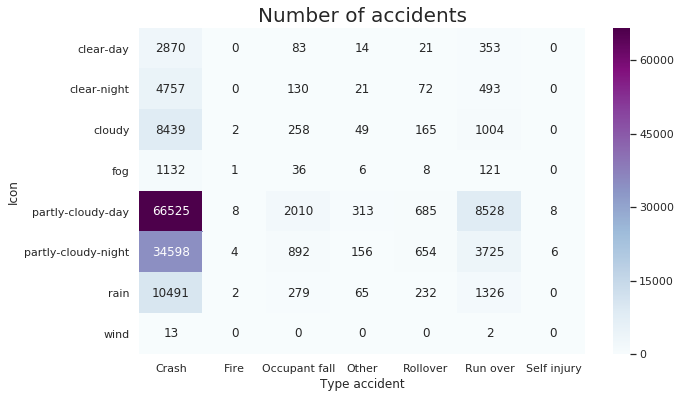

In [103]:
fig = plt.figure(figsize=(10,6))
map1 = sns.heatmap(type_icon, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('Type accident')
plt.ylabel('Icon')
plt.yticks(rotation=0)
plt.show()

we do crosstab for icon-weather and accident severity

In [104]:
severity_icon=pd.crosstab(accidents_All1.icon,accidents_All1.severity)
severity_icon

severity,Fatality,Injury,Material damage
icon,,,
clear-day,46,981,2314
clear-night,107,1872,3494
cloudy,152,3507,6258
fog,19,334,951
partly-cloudy-day,1143,23828,53106
partly-cloudy-night,757,13456,25822
rain,233,4442,7720
wind,1,4,10


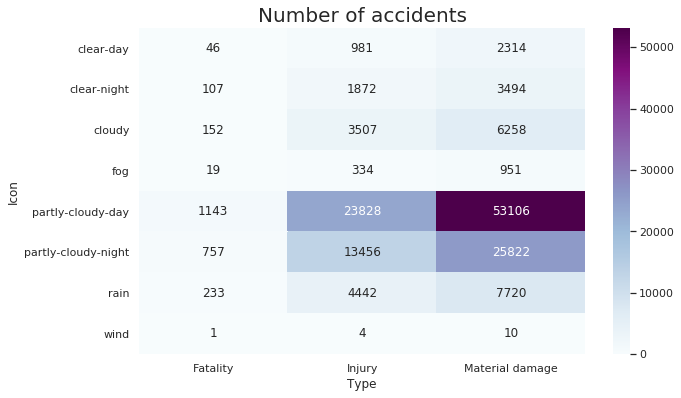

In [105]:
fig = plt.figure(figsize=(10,6))
map1 = sns.heatmap(severity_icon, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('Type')
plt.ylabel('Icon')
plt.yticks(rotation=0)
plt.show()

we do crosstab for summary-weather and accident type

In [106]:
summary_type=pd.crosstab(accidents_All1.summary,accidents_All1.accident_type)
summary_type

accident_type,Crash,Fire,Occupant fall,Other,Rollover,Run over,Self injury
summary,,,,,,,
Clear,7627,0,213,35,93,846,0
Dangerously Windy and Mostly Cloudy,9,0,0,0,0,2,0
Foggy,1132,1,36,6,8,121,0
Heavy Rain,3,0,0,0,0,0,0
Humid and Mostly Cloudy,2,0,0,0,0,1,0
Humid and Partly Cloudy,10,0,0,0,1,3,0
Light Rain,4,0,0,0,0,1,0
Mostly Cloudy,53948,9,1517,236,711,6421,3
Overcast,8439,2,258,49,165,1004,0


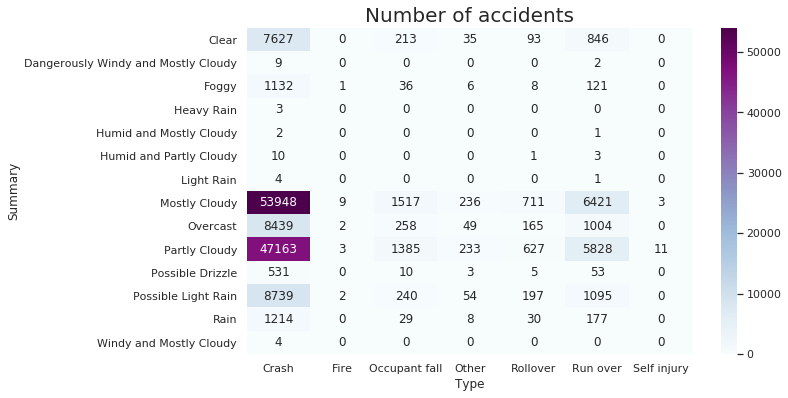

In [107]:
fig = plt.figure(figsize=(10,6))
map1 = sns.heatmap(summary_type, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('Type')
plt.ylabel('Summary')
plt.yticks(rotation=0)
plt.show()

we do crosstab for summary-weather and accident severity

In [108]:
summary_severity=pd.crosstab(accidents_All1.summary,accidents_All1.severity)
summary_severity

severity,Fatality,Injury,Material damage
summary,,,
Clear,153,2853,5808
Dangerously Windy and Mostly Cloudy,1,3,7
Foggy,19,334,951
Heavy Rain,0,1,2
Humid and Mostly Cloudy,0,2,1
Humid and Partly Cloudy,1,6,7
Light Rain,0,1,4
Mostly Cloudy,956,19690,42199
Overcast,152,3507,6258


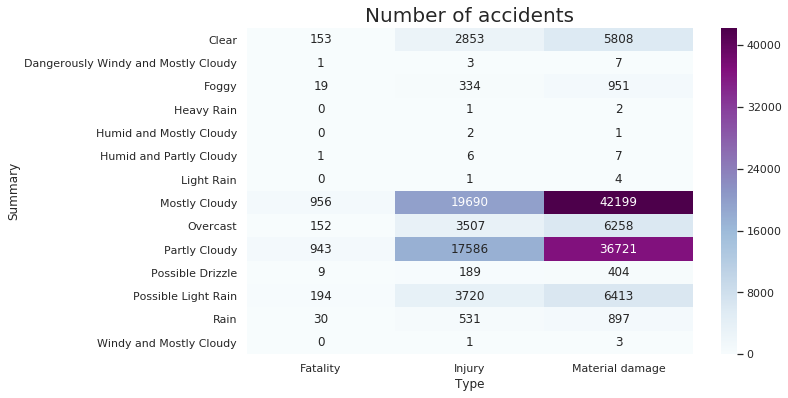

In [109]:
fig = plt.figure(figsize=(10,6))
map1 = sns.heatmap(summary_severity, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('Type')
plt.ylabel('Summary')
plt.yticks(rotation=0)
plt.show()

we compare the monthly precipIntensity, by statistics such as min, max and mean

In [111]:
m_precipIntensity=accidents_All1[['month','precipIntensity']].groupby('month').agg(['mean','max','min'])
m_precipIntensity

precipIntensity              
                 mean      max  min
month                              
1            0.100656   4.4669  0.0
2            0.092029   5.0130  0.0
3            0.144437   5.5322  0.0
4            0.186541   4.6145  0.0
5            0.165624   5.3075  0.0
6            0.144889  20.7540  0.0
7            0.130657   4.3291  0.0
8            0.056141   2.2244  0.0
9            0.218574   7.0199  0.0
10           0.307916   5.5910  0.0
11           0.273159   5.5296  0.0
12           0.182995   4.7115  0.0

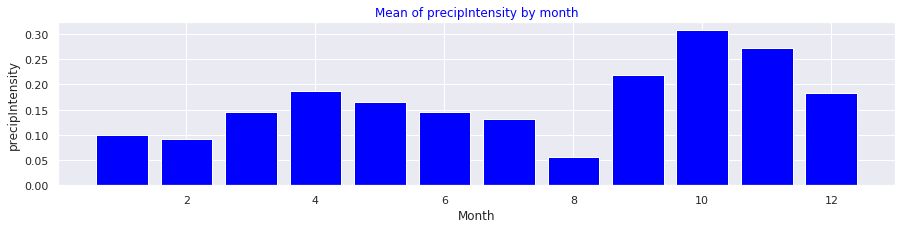

In [130]:
fig, ax = plt.subplots(figsize=(15,3))
ax.bar(m_precipIntensity.index, m_precipIntensity.precipIntensity['mean'],color='blue')
plt.title('Mean of precipIntensity by month', color="blue")
plt.xlabel('Month');
plt.ylabel('precipIntensity');

we compare the monthly temperature, by statistics such as min, max and mean

In [132]:
m_temperature=accidents_All1[['month','temperature']].groupby('month').agg(['mean','max','min'])
m_temperature

temperature             
             mean    max   min
month                         
1       13.590798  23.92  1.18
2       14.182278  27.01  2.03
3       14.447495  24.00  3.04
4       14.377852  22.03  2.72
5       14.456883  24.00  5.71
6       13.994585  26.98  5.44
7       13.826399  27.00  5.17
8       13.795901  38.00  4.18
9       13.912274  33.98  3.04
10      13.912876  31.03  2.28
11      14.118745  24.04  5.17
12      13.802658  24.01  1.78

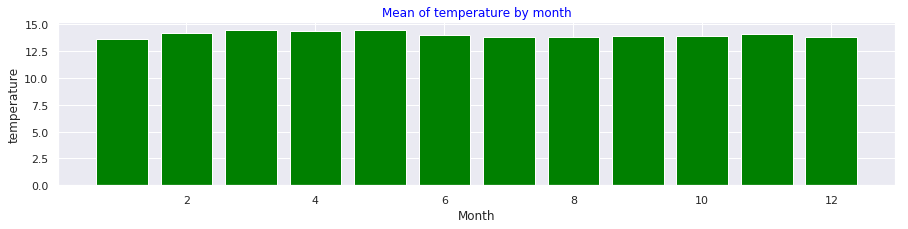

In [134]:
fig, ax = plt.subplots(figsize=(15,3))
ax.bar(m_temperature.index, m_temperature.temperature['mean'],color='green')
plt.title('Mean of temperature by month', color="blue")
plt.xlabel('Month');
plt.ylabel('temperature');

we calculate the mean temperature and mean precipIntensity for each borough

In [135]:
w_by_borough=accidents_All1[['borough','precipIntensity','temperature']].groupby('borough').mean()
w_by_borough

,precipIntensity,temperature
borough,,
ANTONIO NARIÑO,0.163732,14.169754
BARRIOS UNIDOS,0.163394,14.167463
BOSA,0.193368,14.405374
CANDELARIA,0.161242,13.216553
CHAPINERO,0.158000,13.834235
CIUDAD BOLIVAR,0.190681,13.632831
ENGATIVA,0.162100,14.212741
FONTIBON,0.178958,14.269981
KENNEDY,0.183687,14.251102


we relate temperature values to the severity of accidents

In [136]:
t_severity=accidents_All1[['severity','temperature']].groupby('severity').agg(['mean','median','max','min'])
t_severity

temperature                    
                       mean  median   max   min
severity                                       
Fatality          14.091106  13.990  28.0  1.84
Injury            14.055684  13.915  38.0  1.28
Material damage   14.039147  13.910  38.0  1.18

we relate precipIntensity values to the severity of accidents

In [138]:
accidents_All1[['severity','precipIntensity']].groupby('severity').agg(['mean','max','min','median'])

precipIntensity                     
                           mean      max  min median
severity                                            
Fatality               0.189611   6.6848  0.0    0.0
Injury                 0.190760  20.7540  0.0    0.0
Material damage        0.161203  16.5834  0.0    0.0

## for dash

calculate statistical temperature values for each year

In [141]:
t_year=accidents_All1[['year','temperature']].groupby('year').agg(['mean','max','min','median'])
t_year

temperature                    
            mean    max   min median
year                                
2015   14.158686  28.03  2.19  14.01
2016   14.354792  33.98  1.28  14.01
2017   14.008842  38.00  1.18  13.91
2018   13.812491  27.01  1.67  13.68
2019   13.873506  21.91  5.98  13.57

In [149]:
mt_2015=round(t_year.temperature['mean'][2015],2)
mt_2016=round(t_year.temperature['mean'][2016],2)
mt_2017=round(t_year.temperature['mean'][2017],2)
mt_2018=round(t_year.temperature['mean'][2018],2)
mt_2019=round(t_year.temperature['mean'][2019],2)
print(mt_2015,mt_2016,mt_2017,mt_2018,mt_2019)

14.16 14.35 14.01 13.81 13.87


In [154]:
maxt_2015=round(t_year.temperature['max'][2015],2)
maxt_2016=round(t_year.temperature['max'][2016],2)
maxt_2017=round(t_year.temperature['max'][2017],2)
maxt_2018=round(t_year.temperature['max'][2018],2)
maxt_2019=round(t_year.temperature['max'][2019],2)
print(maxt_2015,maxt_2016,maxt_2017,maxt_2018,maxt_2019)

28.03 33.98 38.0 27.01 21.91


In [155]:
mint_2015=round(t_year.temperature['min'][2015],2)
mint_2016=round(t_year.temperature['min'][2016],2)
mint_2017=round(t_year.temperature['min'][2017],2)
mint_2018=round(t_year.temperature['min'][2018],2)
mint_2019=round(t_year.temperature['min'][2019],2)
print(mint_2015,mint_2016,mint_2017,mint_2018,mint_2019)

2.19 1.28 1.18 1.67 5.98


calculate statistical precipIntensity values for each year

In [150]:
p_year=accidents_All1[['year','precipIntensity']].groupby('year').agg(['mean','max','min','median'])
p_year

precipIntensity                     
                mean     max  min  median
year                                     
2015        0.000000   0.000  0.0  0.0000
2016        0.000000   0.000  0.0  0.0000
2017        0.000000   0.000  0.0  0.0000
2018        0.298665   5.591  0.0  0.0000
2019        0.634511  20.754  0.0  0.3671

In [153]:
mp_2015=round(p_year.precipIntensity['mean'][2015],2)
mp_2016=round(p_year.precipIntensity['mean'][2016],2)
mp_2017=round(p_year.precipIntensity['mean'][2017],2)
mp_2018=round(p_year.precipIntensity['mean'][2018],2)
mp_2019=round(p_year.precipIntensity['mean'][2019],2)
print(mp_2015,mp_2016,mp_2017,mp_2018,mp_2019)

0.0 0.0 0.0 0.3 0.63


In [156]:
maxp_2015=round(p_year.precipIntensity['max'][2015],2)
maxp_2016=round(p_year.precipIntensity['max'][2016],2)
maxp_2017=round(p_year.precipIntensity['max'][2017],2)
maxp_2018=round(p_year.precipIntensity['max'][2018],2)
maxp_2019=round(p_year.precipIntensity['max'][2019],2)
print(maxp_2015,maxp_2016,maxp_2017,maxp_2018,maxp_2019)

0.0 0.0 0.0 5.59 20.75


In [157]:
minp_2015=round(p_year.precipIntensity['min'][2015],2)
minp_2016=round(p_year.precipIntensity['min'][2016],2)
minp_2017=round(p_year.precipIntensity['min'][2017],2)
minp_2018=round(p_year.precipIntensity['min'][2018],2)
minp_2019=round(p_year.precipIntensity['min'][2019],2)
print(minp_2015,minp_2016,minp_2017,minp_2018,minp_2019)

0.0 0.0 0.0 0.0 0.0


we do crosstab for summary-weather and year

In [158]:
summary_year=pd.crosstab(accidents_All1.summary,accidents_All1.year)
summary_year

year,2015,2016,2017,2018,2019
summary,,,,,
Clear,2443,2533,2240,1028,570
Dangerously Windy and Mostly Cloudy,11,0,0,0,0
Foggy,194,542,447,112,9
Heavy Rain,0,0,0,0,3
Humid and Mostly Cloudy,3,0,0,0,0
Humid and Partly Cloudy,8,6,0,0,0
Light Rain,0,0,0,4,1
Mostly Cloudy,12594,14352,15443,10026,10430
Overcast,303,223,282,2473,6636


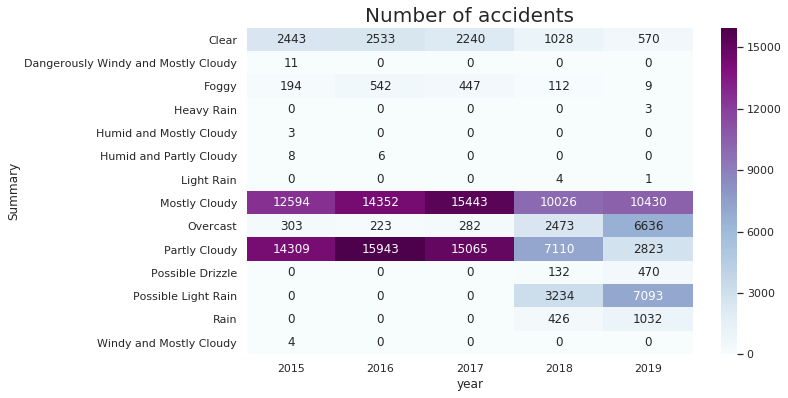

In [160]:
fig = plt.figure(figsize=(10,6))
map1 = sns.heatmap(summary_year, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('year')
plt.ylabel('Summary')
plt.yticks(rotation=0)
plt.show()

# correlation matrix

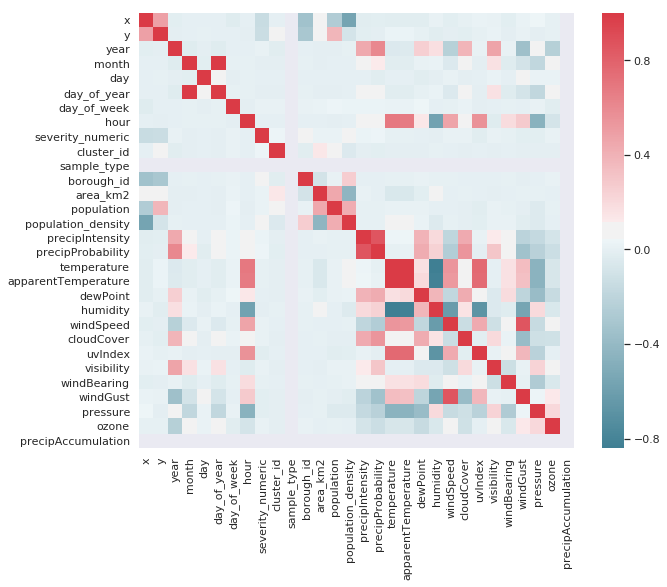

In [46]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = accidents_All1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)

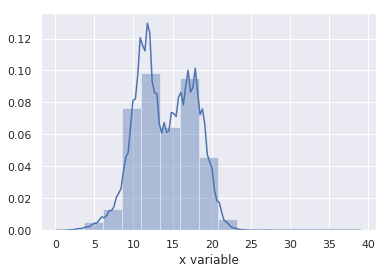

In [161]:
import pandas as pd
x = pd.Series(accidents_All1['temperature'][accidents_All1['temperature'].notnull()], name="x variable")
ax = sns.distplot(x, hist=True,bins=15)

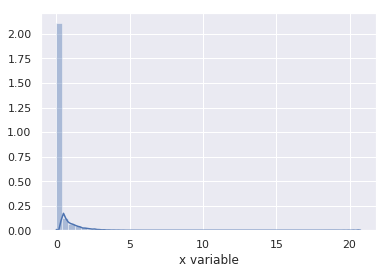

In [162]:
import pandas as pd
x = pd.Series(accidents_All1['precipIntensity'][accidents_All1['precipIntensity'].notnull()], name="x variable")
ax = sns.distplot(x, hist=True)

## Space time analysis

In [163]:
col=accidents_All1.columns
col
#.to_latex(index=False)

Index(['x', 'y', 'timestamp', 'date', 'year', 'month', 'day', 'day_of_year',
       'day_of_week', 'hour', 'address', 'severity', 'accident_type',
       'severity_numeric', 'borough', 'cluster_id', 'sample_type',
       'borough_id', 'area_km2', 'population', 'population_density',
       'timestamp_darksky', 'summary', 'icon', 'precipIntensity',
       'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint',
       'humidity', 'windSpeed', 'cloudCover', 'uvIndex', 'visibility',
       'windBearing', 'windGust', 'pressure', 'precipType', 'ozone',
       'precipAccumulation'],
      dtype='object')

In [164]:
accidents_All1.shape

(160623, 40)

## accidents by borough and severity

In [169]:
borough_severity=pd.crosstab(accidents_All1.borough,accidents_All1.severity).sort_values('Fatality')
borough_severity

severity,Fatality,Injury,Material damage
borough,,,
SUMAPAZ,1,9,7
CANDELARIA,23,391,761
ANTONIO NARIÑO,55,1266,1611
SANTA FE,69,1850,2914
CHAPINERO,79,2314,7967
LOS MARTIRES,87,1963,3291
BARRIOS UNIDOS,88,2274,6181
SAN CRISTOBAL,98,1520,1372
TEUSAQUILLO,101,2360,6493


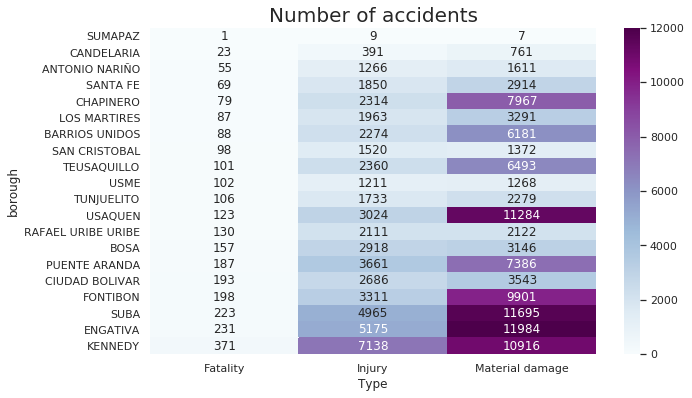

In [171]:
fig = plt.figure(figsize=(10,6))
map1 = sns.heatmap(borough_severity, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('Type')
plt.ylabel('borough')
plt.yticks(rotation=0)
plt.show()

# Accidents by year 2015-2019

count by year

In [172]:
by_year=accidents_All1['year'].value_counts(sort=True).rename_axis('year').reset_index(name='Total').sort_values(by='year').reset_index(drop=True)
by_year

,year,Total
0,2015,30426
1,2016,33921
2,2017,34097
3,2018,33112
4,2019,29067


accidents by year and severity

In [176]:
year_severity=pd.crosstab(accidents_All1.year, accidents_All1.severity)
year_severity

severity,Fatality,Injury,Material damage
year,,,
2015,529,10314,19583
2016,565,10227,23129
2017,537,10012,23548
2018,499,11124,21489
2019,492,10203,18372


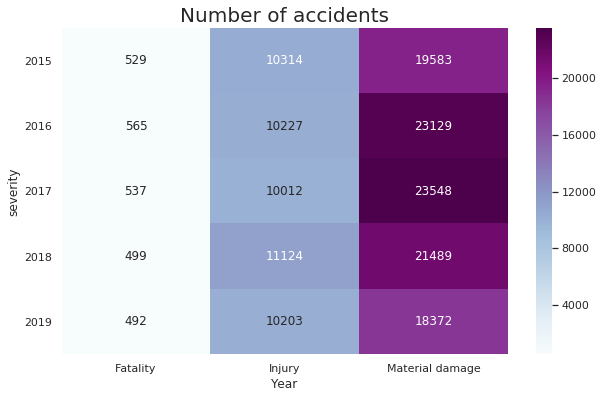

In [177]:
fig = plt.figure(figsize=(10,6))
map1 = sns.heatmap(year_severity, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('Year')
plt.ylabel('severity')
plt.yticks(rotation=0)
plt.show()

In [178]:
by_year=accidents_All1['year'].value_counts(sort=True).rename_axis('year').reset_index(name='counts').sort_values(by='year').reset_index(drop=True)
by_year

,year,counts
0,2015,30426
1,2016,33921
2,2017,34097
3,2018,33112
4,2019,29067


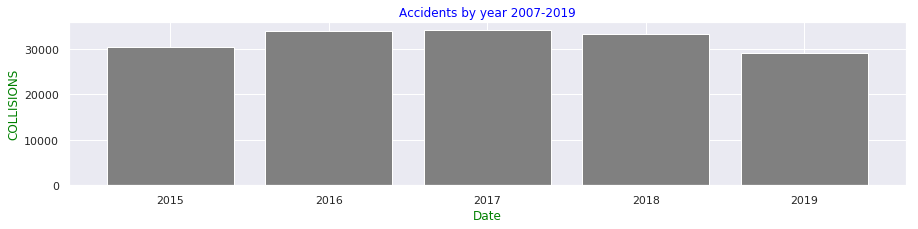

In [179]:
fig, ax = plt.subplots(figsize=(15,3))
ax.bar(by_year['year'], by_year['counts'],color='gray')
plt.title('Accidents by year 2007-2019', color="blue")
plt.xlabel('Date',color="green");
plt.ylabel('COLLISIONS',color="green");

# Accidents by hour 20015-2019

In [181]:
by_hour=accidents['hour'].value_counts(sort=True).rename_axis('hour').reset_index(name='counts').sort_values(by='hour').reset_index(drop=True)
by_hour

,hour,counts
0,0,4772
1,1,4035
2,2,3578
3,3,4164
4,4,4620
5,5,10646
6,6,19220
7,7,24824
8,8,22993
9,9,20269


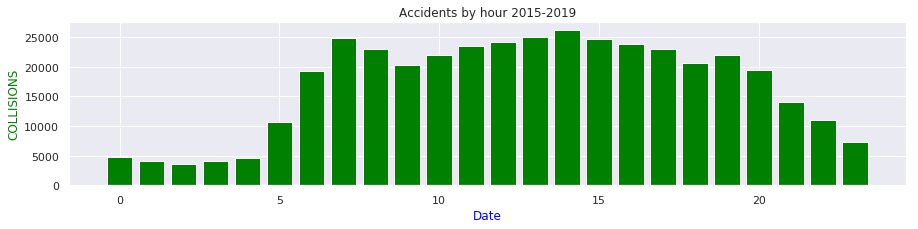

In [182]:
fig, ax = plt.subplots(figsize=(15,3))
ax.bar(by_hour['hour'], by_hour['counts'],color='green')
plt.title('Accidents by hour 2015-2019')
plt.xlabel('Date',color="blue");
plt.ylabel('COLLISIONS',color="green");

# More EDA

# BOGOTA MAP

In [165]:
folium_map = folium.Map(location=[4.624335, -74.063644],
                        zoom_start=13,
                        tiles="OpenStreetMap")
folium_map